# Is Unanimous MVP Stephen Curry the Best Curry?
Stephen Curry is the first player to receive an unanimous MVP in NBA history. Many analyst and reporters concluded that his unanimous MVP season was the best Stephen Curry that ever walked on the court. The goal of this notebook is to analyze Stephen Curry's stats and determine whether unanimous MVP Stephen Curry is the best Stephen Curry. However, since MVP Awards only take regular seasons into account, we will also find the best post-season Stephen Curry has played.

## Understanding and Cleaning the Dataset

In [1]:
library(ggplot2)
Curry <- read.csv("C:/Users/Mumen Rider/Desktop/Curry/Stephen Curry Stats.csv")
tail(Curry)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


,Season_year,Season_div,Date,OPP,Result,T.Score,O.Score,MIN,FG,FGM,...,FTM,FTA,FT.,REB,AST,BLK,STL,PF,TO,PTS
916,2020-2021,Regular,Tue 12/22,BKN,L,99,125,30,7-21,7,...,4,4,100.0,4,10,0,2,1,3,20
917,2020-2021,Regular,Fri 5/21,MEM,L,112,117,47,13-28,13,...,7,7,100.0,4,5,0,3,5,7,39
918,2020-2021,Regular,Wed 5/19,LAL,L,100,103,41,12-23,12,...,7,8,87.5,7,3,0,0,2,6,37
919,2020-2021,Regular,Thu 12/17,SAC,W,113,105,29,9-23,9,...,5,5,100.0,6,3,0,2,2,1,29
920,2020-2021,Regular,Tue 12/15,SAC,L,113,114,28,11-21,11,...,2,3,66.7,4,4,1,3,0,4,29
921,2020-2021,Regular,Sat 12/12,DEN,W,107,105,21,3-10,3,...,2,2,100.0,1,3,0,2,1,3,10


We are going to remove Preseason stats because those do not reflect how Curry operate and how he plays his game. Additionally, We are also removing seasons stats where there is not enough sample size because he did not play enough games.

In [2]:
Curry <- subset(Curry,!(Season_div == 'Pre')) #Removing all games that were played in the Pre-season
seasons <- unique(Curry$Season_year)

In [3]:
#Print how many games Curry played in each season
for (x in 1:length(seasons)){
    cat("Games played in", levels(seasons)[x], "Season:", nrow(Curry[Curry$Season_year == seasons[x],]), '\n')
}

Games played in 2009-2010 Season: 80 
Games played in 2010-2011 Season: 74 
Games played in 2011-2012 Season: 25 
Games played in 2012-2013 Season: 90 
Games played in 2013-2014 Season: 85 
Games played in 2014-2015 Season: 101 
Games played in 2015-2016 Season: 97 
Games played in 2016-2017 Season: 96 
Games played in 2017-2018 Season: 66 
Games played in 2018-2019 Season: 91 
Games played in 2019-2020 Season: 5 
Games played in 2020-2021 Season: 68 


Based on the amount of gamess, we are going to remove the 2011-2012 and 2019-2020 seasons where he played >=25 games. Upon manually checking, I noticed that the latest season, 2020-2021, only has Regular season stats. There may be a mistake and will need to be fixed.

In [4]:
unique(Curry[Curry$Season_year == '2020-2021',]$Season_div)
tail(Curry[Curry$Season_year == '2020-2021',])

[1] Regular
Levels: Post Pre Regular

,Season_year,Season_div,Date,OPP,Result,T.Score,O.Score,MIN,FG,FGM,...,FTM,FTA,FT.,REB,AST,BLK,STL,PF,TO,PTS
916,2020-2021,Regular,Tue 12/22,BKN,L,99,125,30,7-21,7,...,4,4,100.0,4,10,0,2,1,3,20
917,2020-2021,Regular,Fri 5/21,MEM,L,112,117,47,13-28,13,...,7,7,100.0,4,5,0,3,5,7,39
918,2020-2021,Regular,Wed 5/19,LAL,L,100,103,41,12-23,12,...,7,8,87.5,7,3,0,0,2,6,37
919,2020-2021,Regular,Thu 12/17,SAC,W,113,105,29,9-23,9,...,5,5,100.0,6,3,0,2,2,1,29
920,2020-2021,Regular,Tue 12/15,SAC,L,113,114,28,11-21,11,...,2,3,66.7,4,4,1,3,0,4,29
921,2020-2021,Regular,Sat 12/12,DEN,W,107,105,21,3-10,3,...,2,2,100.0,1,3,0,2,1,3,10


The first regular season game the Warriors played with Stephen Curry is 12/22 against BKN while the last regular season game they played is 5/16 against MEM. Luckily, at the tail end of the Curry dataframe are where all the games we can remove. Thus we are removing the last 5 rows on the dataset.

In [5]:
#Removing all games that have small sample size and ones with incorrect data
Curry <- subset(Curry,!(Season_year == '2011-2012')) 
Curry <- subset(Curry,!(Season_year == '2019-2020'))
Curry <- head(Curry, -5)

In [6]:
seasons <- unique(Curry$Season_year)
for (x in 1:length(seasons)){
    cat("Games played in", levels(droplevels(Curry$Season_year))[x], "Season:", nrow(Curry[Curry$Season_year == seasons[x],]), '\n')
}

Games played in 2009-2010 Season: 80 
Games played in 2010-2011 Season: 74 
Games played in 2012-2013 Season: 90 
Games played in 2013-2014 Season: 85 
Games played in 2014-2015 Season: 101 
Games played in 2015-2016 Season: 97 
Games played in 2016-2017 Season: 96 
Games played in 2017-2018 Season: 66 
Games played in 2018-2019 Season: 91 
Games played in 2020-2021 Season: 63 


Now we are finish cleaning up the data and we can move on to determining Stephen Curry's best year.
## Visualizing Curry's Stats

We will be using Points, Assist, Rebounds and Curry's shooting splits to determine his best year and compare with his Unanimous MVP. First let us isolate the samples that we need by subsetting the Regular season and Post-Season into two separate dataframes. Then use GGPlot to create line charts for both dataframes presenting the averages for each season.

In [7]:
library(reshape2)
options(repr.plot.height=4) #Decreasing plot size
Regular = data.frame(matrix(ncol=7, nrow=length(seasons))) #creating Regular Season dataframe
colnames(Regular) <- c('Season','PTS','AST','REB','FG%','3P%', 'FT%')
RegSeason <- subset(Curry,Season_div == 'Regular')

The FT%, FG%, and 3P% in the original dataset are calculate per game. It does not reflect the percentages for the whole season. We cannot use the mean function in R to find the average. Thus, we need to calculate these percentages and add them into our newly created dataframe.

In [8]:
#Adding in values in the new dataframe
for (x in 1:length(seasons)){
    Regular[x,] <- c(levels(droplevels(Curry$Season_year))[x], 
                round(mean(RegSeason[RegSeason$Season_year==seasons[x],]$PTS), digits=1), 
                round(mean(RegSeason[RegSeason$Season_year==seasons[x],]$AST), digits=1),
                round(mean(RegSeason[RegSeason$Season_year==seasons[x],]$REB), digits=1),
                round(sum(RegSeason[RegSeason$Season_year==seasons[x],]$FGM) / sum(RegSeason[RegSeason$Season_year==seasons[x],]$FGA), digits=3),
                round(sum(RegSeason[RegSeason$Season_year==seasons[x],]$X3PTM) / sum(RegSeason[RegSeason$Season_year==seasons[x],]$X3PTA), digits=3),
                round(sum(RegSeason[RegSeason$Season_year==seasons[x],]$FTM) / sum(RegSeason[RegSeason$Season_year==seasons[x],]$FTA), digits=3))
}

In [9]:
Regular

Season,PTS,AST,REB,FG%,3P%,FT%
2009-2010,17.5,5.9,4.5,0.462,0.437,0.885
2010-2011,18.6,5.8,3.9,0.48,0.442,0.934
2012-2013,22.9,6.9,4,0.451,0.453,0.9
2013-2014,24,8.5,4.3,0.471,0.424,0.885
2014-2015,23.8,7.7,4.3,0.487,0.443,0.914
2015-2016,30.1,6.7,5.4,0.504,0.454,0.908
2016-2017,25.3,6.6,4.5,0.468,0.411,0.898
2017-2018,26.4,6.1,5.1,0.495,0.423,0.921
2018-2019,27.3,5.2,5.3,0.472,0.437,0.916
2020-2021,32,5.8,5.5,0.482,0.421,0.916


In [10]:
mRegular <- melt(Regular, 'Season') #modifying dataframe to be used on ggplot much easier
mRegular$value <- as.numeric(mRegular$value)

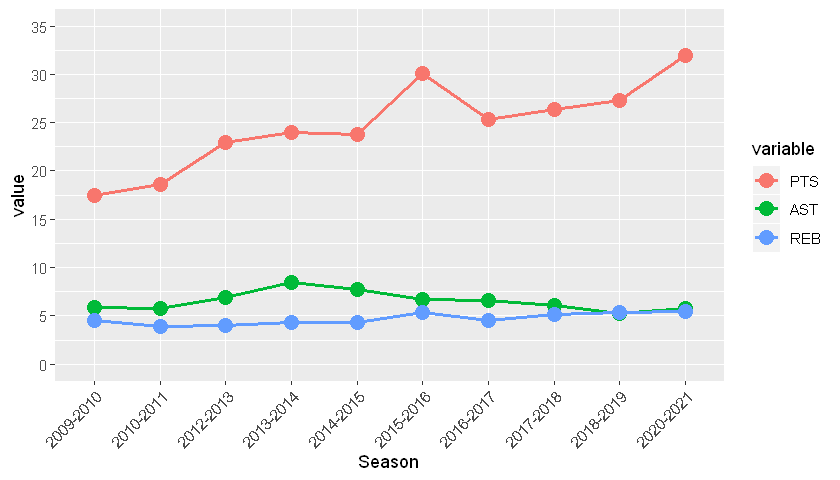

In [11]:
RegPlot1 <- ggplot(mRegular[1:30,], aes(x=Season, y=value, group=variable, color=variable)) + 
            geom_line(size=1) + 
            geom_point(size=4) +
            scale_y_continuous(limits = c(0,35), breaks=seq(0,35,5))
RegPlot1 <- RegPlot1 + theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1))
RegPlot1

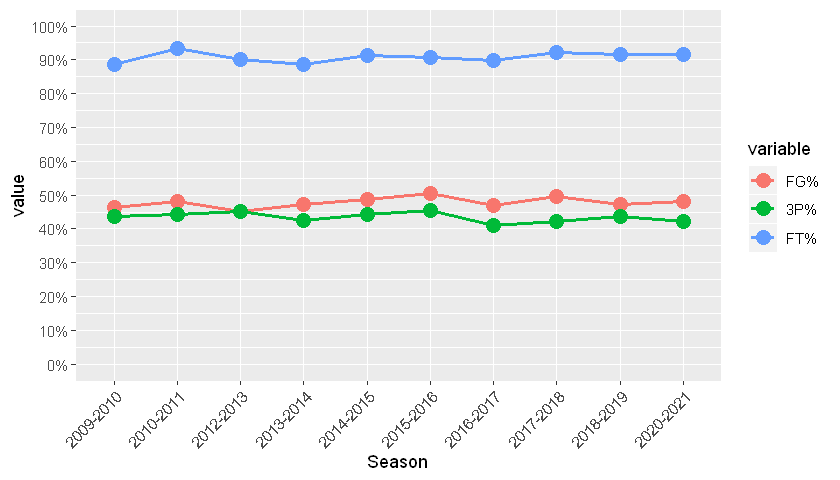

In [12]:
RegPlot2 <- ggplot(mRegular[31:60,], aes(x=Season, y=value, group=variable, color=variable)) + 
            geom_line(size=1) + 
            geom_point(size=4) +
            scale_y_continuous(limits = c(0,1), breaks=seq(0,1,0.1), labels=scales::percent)
RegPlot2 <- RegPlot2 + theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1))
RegPlot2

#### Observation:
* Curry increased his average `PTS` per season except for a spike in the 2015-2016 regular season
* Curry's `AST` average began to continually decrease after the 2013-2014 season
* Curry's averaged the most `PTS` and `REB` in the 2020-2021 regular season, and the most `AST` in the 2013-2014 regular season
* Curry has the best shooting split with 50.4/45.4/90.8 (`FG%`/`3P%`/`FT%`) in the 2015-2016 regular season putting him the 50/40/90 club

In [13]:
PostSeason <- subset(Curry,Season_div=='Post') #creating Post-Season dataframe
pSeason <- unique(PostSeason$Season_year)
Post = data.frame(matrix(ncol=7, nrow=length(pSeason)))
colnames(Post) <- c('Season','PTS','AST','REB','FG%','3P%','FT%')

In [14]:
#Adding values into the dataframe
for (x in 1:length(pSeason)){
    Post[x,] <- c(levels(droplevels(PostSeason$Season_year))[x], 
                round(mean(PostSeason[PostSeason$Season_year==pSeason[x],]$PTS), digits=1), 
                round(mean(PostSeason[PostSeason$Season_year==pSeason[x],]$AST), digits=1),
                round(mean(PostSeason[PostSeason$Season_year==pSeason[x],]$REB), digits=1),
                round(sum(PostSeason[PostSeason$Season_year==pSeason[x],]$FGM) / sum(PostSeason[PostSeason$Season_year==pSeason[x],]$FGA), digits=3),
                round(sum(PostSeason[PostSeason$Season_year==pSeason[x],]$X3PTM) / sum(PostSeason[PostSeason$Season_year==pSeason[x],]$X3PTA), digits=3),
                round(sum(PostSeason[PostSeason$Season_year==pSeason[x],]$FTM) / sum(PostSeason[PostSeason$Season_year==pSeason[x],]$FTA), digits=3))
}

In [15]:
Post

Season,PTS,AST,REB,FG%,3P%,FT%
2012-2013,23.4,8.1,3.8,0.434,0.396,0.921
2013-2014,23,8.4,3.6,0.44,0.386,0.881
2014-2015,28.3,6.4,5,0.456,0.422,0.835
2015-2016,25.1,5.2,5.5,0.438,0.404,0.916
2016-2017,28.1,6.7,6.2,0.484,0.419,0.904
2017-2018,25.5,5.4,6.1,0.451,0.395,0.957
2018-2019,28.2,5.7,6,0.441,0.377,0.943


In [16]:
mPost <- melt(Post, 'Season') #modifying dataframe to fit into ggplot much easier
mPost$value <- as.numeric(mPost$value)

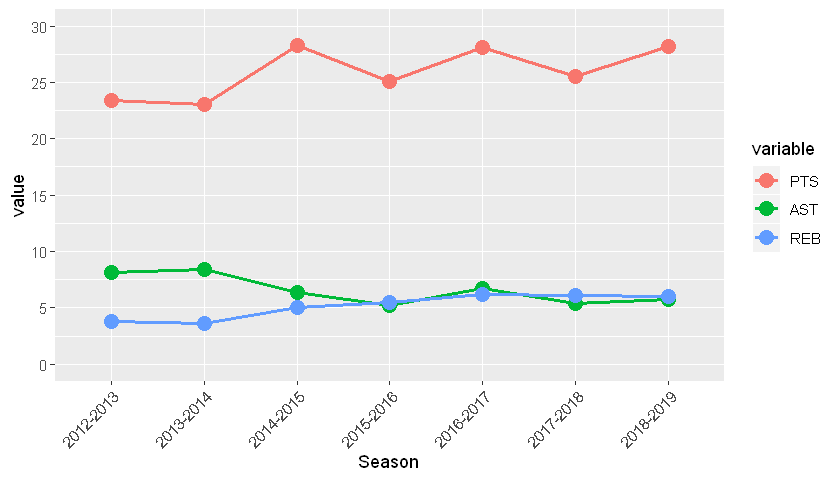

In [17]:
PostPlot1 <- ggplot(mPost[1:21,], aes(x=Season, y=value, group=variable, color=variable)) +
             geom_line(size=1) +
             geom_point(size=4) +
             scale_y_continuous(limits = c(0,30), breaks=seq(0,30,5))
PostPlot1 <- PostPlot1 + theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1))
PostPlot1

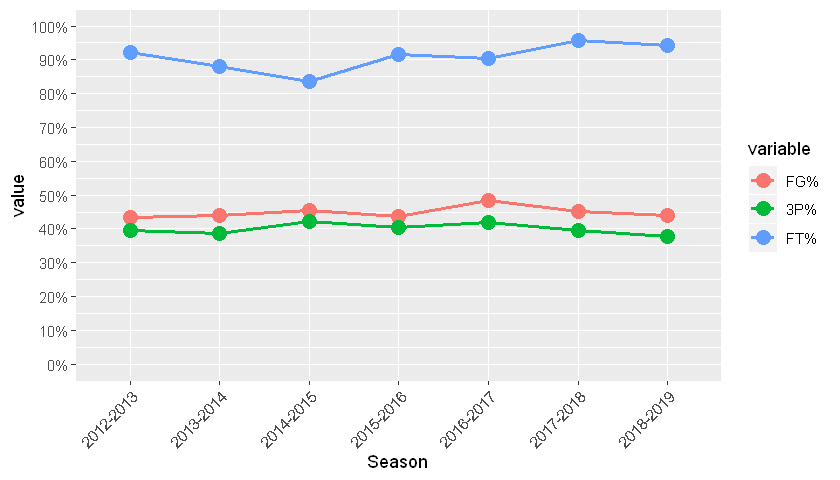

In [18]:
PostPlot2 <- ggplot(mPost[22:42,], aes(x=Season, y=value, group=variable, color=variable)) +
             geom_line(size=1) + 
            geom_point(size=4) +
             scale_y_continuous(limits = c(0,1), breaks=seq(0,1,0.1), labels=scales::percent)
PostPlot2 <- PostPlot2 + theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1))
PostPlot2

#### Observation:
* Curry has three post seasons where he averages more than 28 `PTS`
* Curry continually increased his `REB` after the 2013-2014 post season
* Curry has the best shooting split with 48.4/41.9/90.4 (`FG%`/`3P%`/`FT%`) in the 2016-2017 post season

## Best Regular and Post Season
Let's look at his `2020-2021` regular season where he averaged the most on two of the statistical category, `PTS`and `REB`, and compare it with his Unanimous MVP season `2015-2016`.

In [19]:
rCompare <- Regular[c(6,10),]
mrCompare <- melt(rCompare, 'Season')
mrCompare$value <- as.numeric(mrCompare$value)

In [20]:
rCompare

,Season,PTS,AST,REB,FG%,3P%,FT%
6,2015-2016,30.1,6.7,5.4,0.504,0.454,0.908
10,2020-2021,32,5.8,5.5,0.482,0.421,0.916


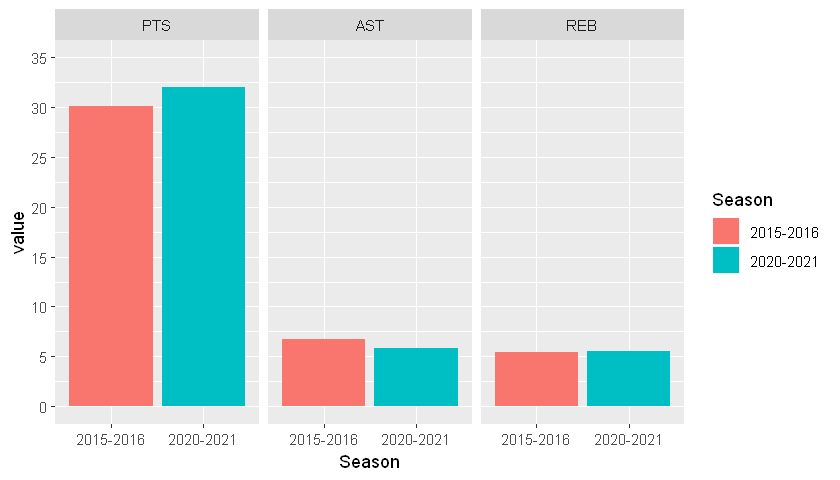

In [21]:
rCPlot1 <- ggplot(mrCompare[1:6,], aes(x=Season, y=value, fill=Season)) +
          geom_bar(stat='identity', position='dodge') +
          scale_y_continuous(limits = c(0,35), breaks=seq(0,35,5)) + facet_grid(~ variable)
rCPlot1

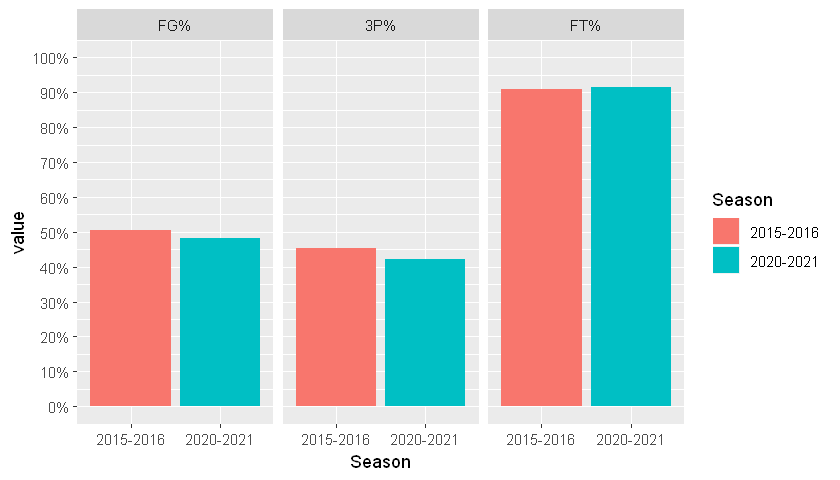

In [22]:
rCPlot2 <- ggplot(mrCompare[7:12,], aes(x=Season, y=value, fill=Season)) +
          geom_bar(stat='identity', position='dodge') +
          scale_y_continuous(limits = c(0,1), breaks=seq(0,1,.1), labels=scales::percent) + facet_grid(~ variable)
rCPlot2

Curry had a higher average `PTS` and `FT%` with a miniscule difference in `REB` in the `2020-2021` regular season; however, in every other statistical category, Curry had a higher average in the `2015-2016` regular season. Reaching the 50/45/90 shooting split in his Unanimous MVP season makes him more efficient than other seasons. Thus we will claim that the `2015-2016` regular season is the best version of Curry.

Now let's compare his best post-season; the `2016-2017` post-season and the `2018-2019` post-season.

In [23]:
pCompare <- Post[c(5,7),]
mpCompare <- melt(pCompare, 'Season')
mpCompare$value <- as.numeric(mpCompare$value)

In [24]:
pCompare

,Season,PTS,AST,REB,FG%,3P%,FT%
5,2016-2017,28.1,6.7,6.2,0.484,0.419,0.904
7,2018-2019,28.2,5.7,6,0.441,0.377,0.943


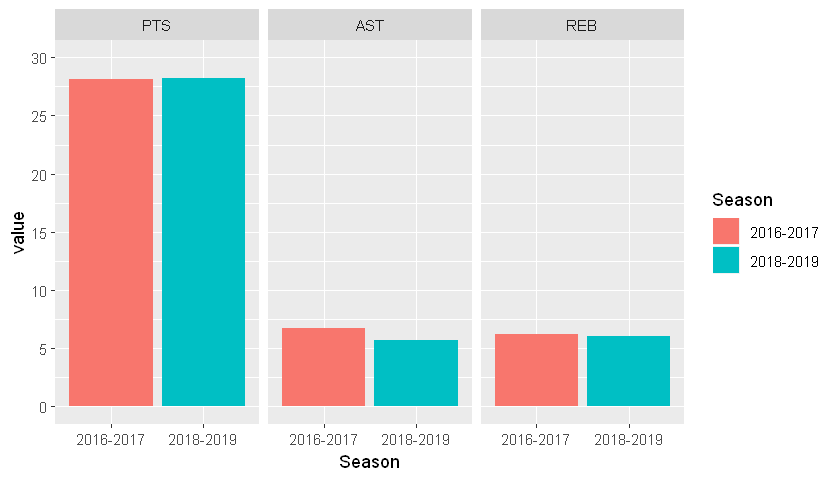

In [25]:
pCPlot1 <- ggplot(mpCompare[1:6,], aes(x=Season, y=value, fill=Season)) +
           geom_bar(stat='identity', position='dodge') +
           scale_y_continuous(limits = c(0,30), breaks=seq(0,30,5)) + facet_grid(~ variable)
pCPlot1

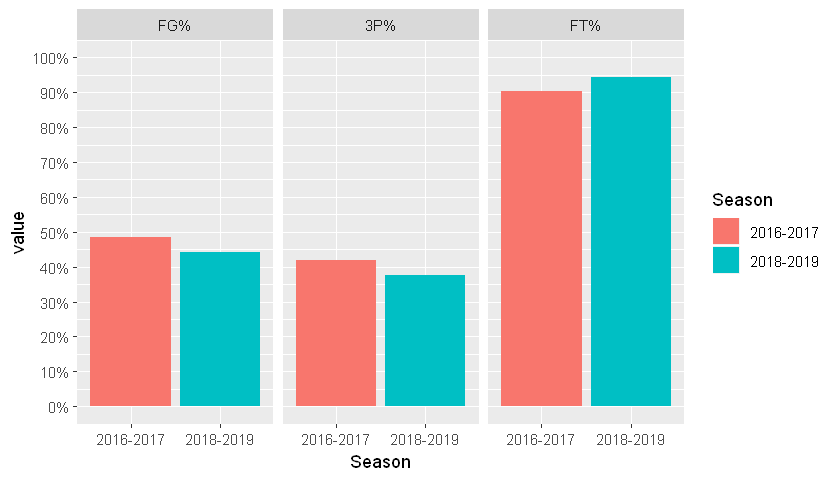

In [26]:
pCPlot2 <- ggplot(mpCompare[7:12,], aes(x=Season, y=value, fill=Season)) +
           geom_bar(stat='identity', position='dodge') +
           scale_y_continuous(limits = c(0,1), breaks=seq(0,1,.1), labels=scales::percent) + facet_grid(~ variable)
pCPlot2

Curry had a higher average in every statistical category except `FT%` and a miniscule difference in `PTS` in the `2016-2017` season. The `2018-2019` post-season averaged higher `PTS`, however `2016-2017` had better efficiency almost reaching 50/40/90 shooting split. Thus we will claim that the `2016-2017` post-season was the best Curry played.

## Hypothesis Testing

We will be calculating a new column called `TS%` and use t.test to see if it is statistically significant.
   * `TS%` = `PTS` / (2 x `TSA`)
   * `TSA` = `FGA` + (0.44 x `FTA`)

### Regular Season
Our claim was `2015-2016` regular season is better than the `2020-2021` regular season

In [48]:
bestReg <- subset(RegSeason, Season_year=='2015-2016' | Season_year=='2020-2021')
bestReg$TS <- eval(parse(text='PTS/(2 * (FGA + (0.44 * FTA)))'), bestReg)

In [49]:
mean(bestReg[bestReg$Season_year=='2015-2016',]$TS)
mean(bestReg[bestReg$Season_year=='2020-2021',]$TS)

[1] 0.6642751

[1] 0.6503482

In [50]:
t.test(bestReg[bestReg$Season_year=='2020-2021',]$TS, bestReg[bestReg$Season_year=='2015-2016',]$TS, 
       alternative='two.sided', conf.level= 0.99)


	Welch Two Sample t-test

data:  bestReg[bestReg$Season_year == "2020-2021", ]$TS and bestReg[bestReg$Season_year == "2015-2016", ]$TS
t = -0.5804, df = 131.55, p-value = 0.5626
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -0.07664350  0.04878969
sample estimates:
mean of x mean of y 
0.6503482 0.6642751 


### Post Season
Our claim was `2016-2017` post season is better than the `2018-2019` post season

In [43]:
bestPost <- subset(PostSeason, Season_year=='2016-2017' | Season_year=='2018-2019')
bestPost$TS <- eval(parse(text='PTS/(2 * (FGA + (0.44 * FTA)))'), bestPost)

In [45]:
mean(bestReg[bestPost$Season_year=='2016-2017',]$TS)
mean(bestReg[bestPost$Season_year=='2018-2019',]$TS)

[1] 0.6285441

[1] 0.6574912

In [46]:
t.test(bestReg[bestPost$Season_year=='2018-2019',]$TS, bestReg[bestReg$Season_year=='2016-2017',]$TS, 
       alternative='two.sided', conf.level= 0.99)


	Welch Two Sample t-test

data:  bestReg[bestPost$Season_year == "2018-2019", ]$TS and bestReg[bestReg$Season_year == "2016-2017", ]$TS
t = 1.3892, df = 164.28, p-value = 0.1667
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -0.02841097  0.09327745
sample estimates:
mean of x mean of y 
0.6574912 0.6250579 


## Conclusion

Based on our `TS%` metric, we have evidence that the `2015-2016` regular season was better than `2020-2021`. However, with our `p-value` > 0.05, this shows that our evidence is not strong enough to suggest that an effect exists in the population. Similar can be said for the post-seasons `2016-2017` and `2018-2019`. Our claim was wrong based on the `TS%` metric, but again, since `p-value` > 0.05, no effect  was obsserved.